# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Load Data

In [3]:
column_names = [
    "lat", 
    "lon", 
    "id", 
    "source_id", 
    "account_id", 
    "title", 
    "created_on", 
    "updated_on", 
    "start_ts", 
    "until_ts",
    "report_type",
    "notes", 
    "layer_id",
    "severity"
]

In [4]:
df = pd.read_table("reports_12DEC16-26DEC16.txt", header=None, names=column_names)
df.dropna(axis=0, how="any", inplace=True)

/Users/brendandorsey/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print df.info()
# print df.describe()
# print df.head()
# print df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98996 entries, 0 to 127327
Data columns (total 14 columns):
lat            98996 non-null float64
lon            98996 non-null float64
id             98996 non-null object
source_id      98996 non-null object
account_id     98996 non-null object
title          98996 non-null object
created_on     98996 non-null object
updated_on     98996 non-null object
start_ts       98996 non-null float64
until_ts       98996 non-null float64
report_type    98996 non-null object
notes          98996 non-null object
layer_id       98996 non-null object
severity       98996 non-null object
dtypes: float64(4), object(10)
memory usage: 11.3+ MB
None


# Location

In [6]:
location_df = df[["lat", "lon"]]
location_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98996 entries, 0 to 127327
Data columns (total 2 columns):
lat    98996 non-null float64
lon    98996 non-null float64
dtypes: float64(2)
memory usage: 2.3 MB


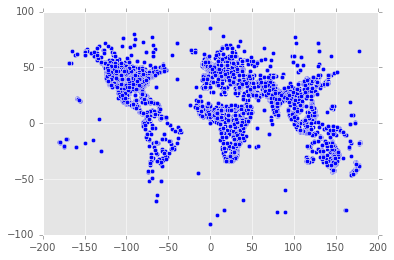

In [7]:
plt.scatter(location_df["lon"], location_df["lat"])#, alpha=0.02)


## K means clustering model

In [8]:
X = location_df.values
X_train, X_test = train_test_split(X)

In [15]:
# max_clusters = range(2, 21)
# best score from above at 2 (0.66), then at 7 (0.62)

# max_clusters = [100, 150, 200, 250, 300, 350, 400, 450, 500]
# best score from above at 500 (0.77)

# max_clusters = [2, 50, 100, 500, 1000, 5000]
# 5000 clusters takes a LONG time locally (~15 mins).
# Scores: 0.659, 0.535, 0.599, 0.773, 0.824, 0.872

max_clusters = [600, 800, 1000, 1200, 1400]
# Scores: 0.789, 0.811, 0.827, 0.838, 0.846

In [ ]:
scores = []
for k in max_clusters:
    print "Calculating with {} clusters...".format(k)
    print "          ...fitting...          "
    model = KMeans(n_clusters=k).fit(X_test)
    print "          ...scoring...          "
    score = silhouette_score(X_test, model.predict(X_test), metric="euclidean")
    scores.append(score)
    print "{0} cluster silhouette score = {1}".format(k, score)

In [13]:
print scores

[]


In [ ]:
plt.plot(max_clusters, scores)

### Grid Search results for k

It looks like 1000 is a good target, but this is just initial exploration and should be revisited. Below is the chart for silhouette scores from 2 to 5000 clusters.

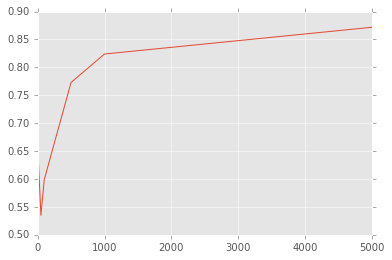

In [12]:
# Plot results from widest grid search
plt.plot([2, 50, 100, 500, 1000, 5000], [0.659, 0.535, 0.599, 0.773, 0.824, 0.872])

# Time Series

Two candidates for time series work, created and start_ts. We will work with start_ts as that indicates the time the report will start being displayed, but this compares the time series data from both

In [45]:
start_timeseries = pd.Series(np.ones(len(df))).reindex(
        pd.to_datetime(
            df["start_ts"], unit="s", errors="ignore"),
        fill_value=1
)
ts = start_timeseries["2016-12-12":"2016-12-27"]

create_timeseries = pd.Series(np.ones(len(df))).reindex(
        pd.to_datetime(
            df["created_on"].astype(int), unit="s", errors="ignore"),
        fill_value=1
)
c_ts = create_timeseries["2016-12-12":"2016-12-27"]

In [46]:
daily = ts.resample("d").sum()
hourly = ts.resample("H").sum()
ten_mins = ts.resample("10T").sum()

c_daily = c_ts.resample("d").sum()
c_hourly = c_ts.resample("H").sum()
c_ten_mins = c_ts.resample("10T").sum()

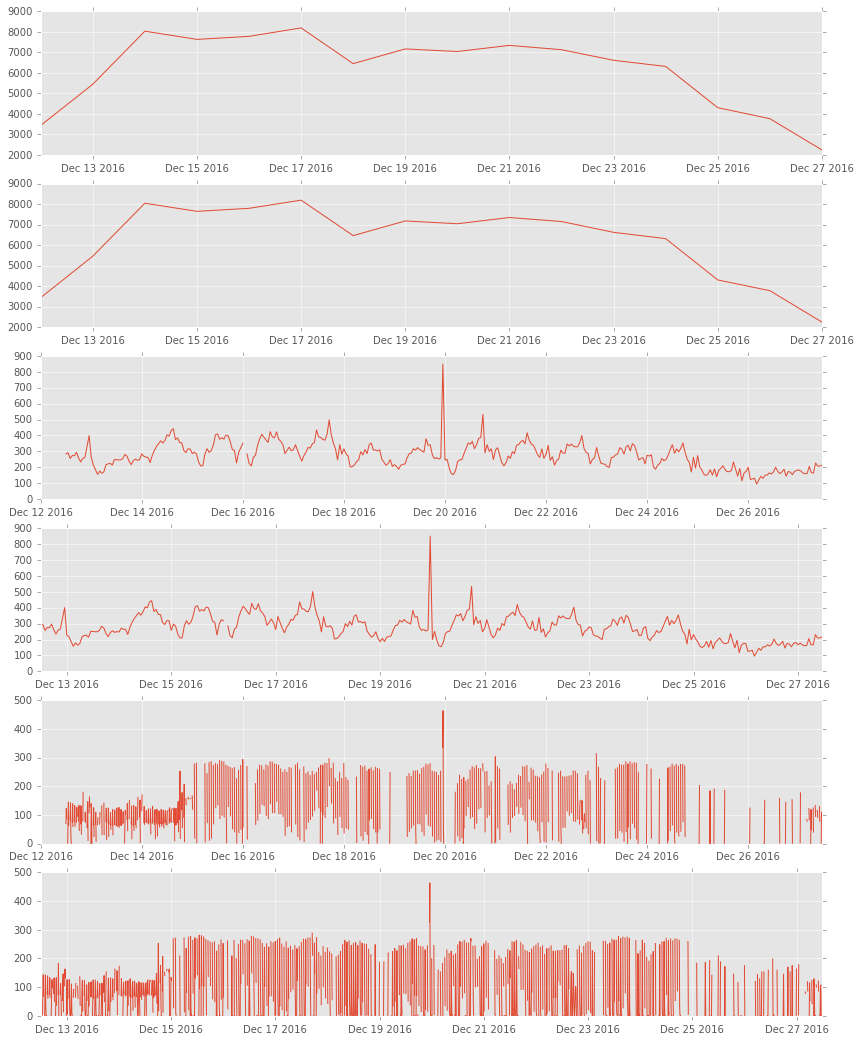

In [47]:
fig, axes = plt.subplots(6, figsize=(14,18))
axes[0].plot(daily)
axes[1].plot(c_daily)
axes[2].plot(hourly)
axes[3].plot(c_hourly)
axes[4].plot(ten_mins)
axes[5].plot(c_ten_mins)